In [4]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl

## Variables

In [12]:
systolic = ctrl.Antecedent(universe = np.arange(70, 200, 1), label = 'Systolic')
diastolic = ctrl.Antecedent(universe = np.arange(40, 130, 1), label = 'Diastolic')
temperature = ctrl.Antecedent(universe = np.arange(34, 43, 1), label = 'temperature')
blood_sugar = ctrl.Antecedent(universe =np.arange(70,135,1), label = 'blood_sugar')

health_cond = ctrl.Consequent(universe=np.arange(0,1,0.1), label='health condition', defuzzify_method='centroid')

## Subsets & Membership functions

In [13]:
systolic['low'] = fuzz.trapmf(systolic.universe, [0, 50, 100, 120])
systolic['ideal'] = fuzz.trapmf(systolic.universe, [100, 120, 140, 150])
systolic['high'] = fuzz.trapmf(systolic.universe, [140, 160, 180,190])
systolic['emergency'] = fuzz.trapmf(systolic.universe, [180, 190, 200, 200])

diastolic['low'] = fuzz.trapmf(diastolic.universe, [0, 0, 55, 70])
diastolic['ideal'] = fuzz.trapmf(diastolic.universe, [60, 70, 80, 90])
diastolic['high'] = fuzz.trapmf(diastolic.universe, [80, 90, 100, 110])
diastolic['emergency'] = fuzz.trapmf(diastolic.universe, [105, 110, 130, 130])

temperature['low'] = fuzz.trapmf(temperature.universe, [34, 34, 35, 36])
temperature['medium'] = fuzz.trimf(temperature.universe, [35, 36, 37])
temperature['high'] = fuzz.trimf(temperature.universe, [36, 37, 38])
temperature['very_high'] = fuzz.trimf(temperature.universe, [37, 39, 41])
temperature['emergency'] = fuzz.trapmf(temperature.universe, [40, 42, 43, 43])

blood_sugar['normal']=fuzz.trapmf(blood_sugar.universe, [70, 70, 85, 100])
blood_sugar['impaired']=fuzz.trapmf(blood_sugar.universe, [90, 100, 115, 125])
blood_sugar['diabetic']=fuzz.trapmf(blood_sugar.universe, [ 120, 125, 135, 135])

health_cond['worst'] = fuzz.trapmf(health_cond.universe, [0.0,0.0,0.15,0.25])
health_cond['poor'] = fuzz.trapmf(health_cond.universe, [0.15,0.25, 0.45, 0.55])
health_cond['good'] = fuzz.trapmf(health_cond.universe,[0.45, 0.55,0.65,0.75])
health_cond['excellant'] = fuzz.trapmf(health_cond.universe, [0.65, 0.75, 1.0, 1.0])



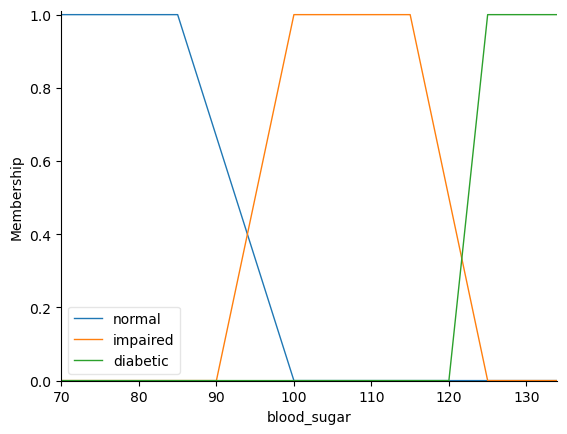

In [14]:
blood_sugar.view()

C:\Users\divos\AppData\Roaming\Python\Python311\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


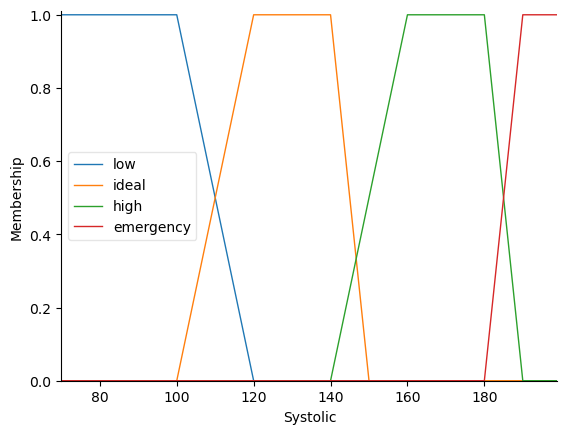

In [34]:
systolic.view()

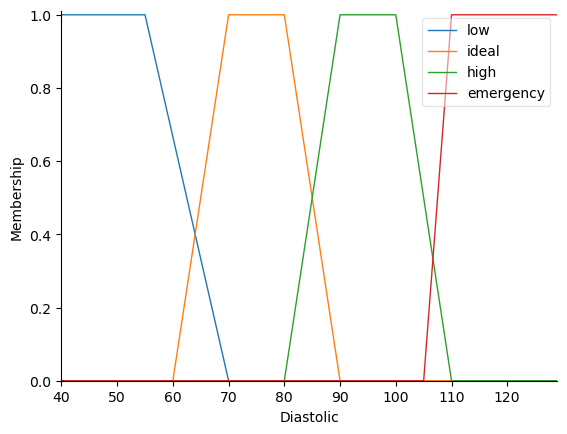

In [35]:
diastolic.view()

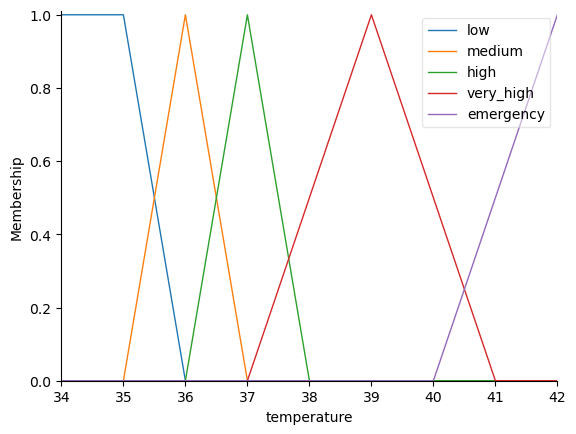

In [36]:
temperature.view()

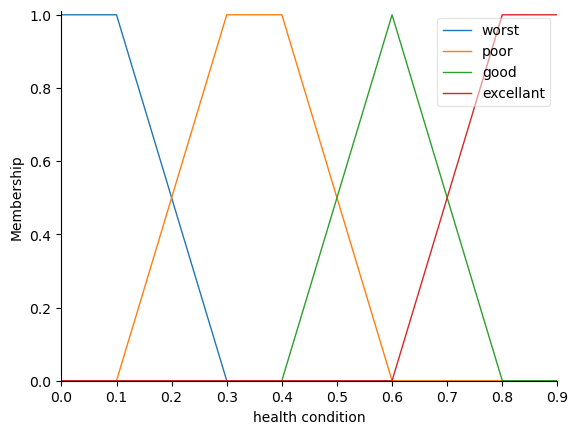

In [37]:
health_cond.view()

## Fuzzy rules

In [38]:
rule1=ctrl.Rule(systolic['low'] & diastolic['low'] & temperature['low'] & blood_sugar['normal'], health_cond['worst'])
rule2=ctrl.Rule(systolic['low'] & diastolic['low'] & temperature['medium'] & blood_sugar['normal'], health_cond['good'])
rule3=ctrl.Rule(systolic['low'] & diastolic['low'] & temperature['high'] & blood_sugar['normal'], health_cond['poor'])
rule4=ctrl.Rule(systolic['low'] & diastolic['low'] & temperature['very_high'] & blood_sugar['normal'], health_cond['worst'])
rule5=ctrl.Rule(systolic['low'] & diastolic['low'] & temperature['low'] & blood_sugar['impaired'], health_cond['worst'])
rule6=ctrl.Rule(systolic['low'] & diastolic['low'] & temperature['medium'] & blood_sugar['impaired'], health_cond['good'])
rule7=ctrl.Rule(systolic['low'] & diastolic['low'] & temperature['high'] & blood_sugar['impaired'], health_cond['poor'])
rule8=ctrl.Rule(systolic['low'] & diastolic['low'] & temperature['very_high'] & blood_sugar['impaired'], health_cond['worst'])

rule9=ctrl.Rule(systolic['low'] & diastolic['ideal'] & temperature['low'] & blood_sugar['normal'], health_cond['poor'])
rule10=ctrl.Rule(systolic['low'] & diastolic['ideal'] & temperature['medium'] & blood_sugar['normal'], health_cond['good'])
rule11=ctrl.Rule(systolic['low'] & diastolic['ideal'] & temperature['high'] & blood_sugar['normal'], health_cond['good'])
rule12=ctrl.Rule(systolic['low'] & diastolic['ideal'] & temperature['very_high'] & blood_sugar['normal'], health_cond['poor'])
rule13=ctrl.Rule(systolic['low'] & diastolic['ideal'] & temperature['low'] & blood_sugar['impaired'], health_cond['poor'])
rule14=ctrl.Rule(systolic['low'] & diastolic['ideal'] & temperature['medium'] & blood_sugar['impaired'], health_cond['good'])
rule15=ctrl.Rule(systolic['low'] & diastolic['ideal'] & temperature['high'] & blood_sugar['impaired'], health_cond['good'])
rule16=ctrl.Rule(systolic['low'] & diastolic['ideal'] & temperature['very_high'] & blood_sugar['impaired'], health_cond['poor'])

rule17=ctrl.Rule(systolic['low'] & diastolic['high'] & temperature['low'] & blood_sugar['normal'], health_cond['poor'])
rule18=ctrl.Rule(systolic['low'] & diastolic['high'] & temperature['medium'] & blood_sugar['normal'], health_cond['good'])
rule19=ctrl.Rule(systolic['low'] & diastolic['high'] & temperature['high'] & blood_sugar['normal'], health_cond['poor'])
rule20=ctrl.Rule(systolic['low'] & diastolic['high'] & temperature['very_high'] & blood_sugar['normal'], health_cond['worst'])
rule21=ctrl.Rule(systolic['low'] & diastolic['high'] & temperature['low'] & blood_sugar['impaired'], health_cond['poor'])
rule22=ctrl.Rule(systolic['low'] & diastolic['high'] & temperature['medium'] & blood_sugar['impaired'], health_cond['good'])
rule23=ctrl.Rule(systolic['low'] & diastolic['high'] & temperature['high'] & blood_sugar['impaired'], health_cond['poor'])
rule24=ctrl.Rule(systolic['low'] & diastolic['high'] & temperature['very_high'] & blood_sugar['impaired'], health_cond['worst'])

rule25=ctrl.Rule(systolic['ideal'] & diastolic['low'] & temperature['low'] & blood_sugar['normal'], health_cond['poor'])
rule26=ctrl.Rule(systolic['ideal'] & diastolic['low'] & temperature['medium'] & blood_sugar['normal'], health_cond['good'])
rule27=ctrl.Rule(systolic['ideal'] & diastolic['low'] & temperature['high'] & blood_sugar['normal'], health_cond['poor'])
rule28=ctrl.Rule(systolic['ideal'] & diastolic['low'] & temperature['very_high'] & blood_sugar['normal'], health_cond['poor'])
rule29=ctrl.Rule(systolic['ideal'] & diastolic['low'] & temperature['low'] & blood_sugar['impaired'], health_cond['poor'])
rule30=ctrl.Rule(systolic['ideal'] & diastolic['low'] & temperature['medium'] & blood_sugar['impaired'], health_cond['good'])
rule31=ctrl.Rule(systolic['ideal'] & diastolic['low'] & temperature['high'] & blood_sugar['impaired'], health_cond['poor'])
rule32=ctrl.Rule(systolic['ideal'] & diastolic['low'] & temperature['very_high'] & blood_sugar['impaired'], health_cond['poor'])


rule33=ctrl.Rule(systolic['ideal'] & diastolic['ideal'] & temperature['low'] & blood_sugar['normal'], health_cond['good'])
rule34=ctrl.Rule(systolic['ideal'] & diastolic['ideal'] & temperature['medium'] & blood_sugar['normal'], health_cond['excellant'])
rule35=ctrl.Rule(systolic['ideal'] & diastolic['ideal'] & temperature['high'] & blood_sugar['normal'], health_cond['good'])
rule36=ctrl.Rule(systolic['ideal'] & diastolic['ideal'] & temperature['very_high'] & blood_sugar['normal'], health_cond['poor'])
rule37=ctrl.Rule(systolic['ideal'] & diastolic['ideal'] & temperature['low'] & blood_sugar['impaired'], health_cond['good'])
rule38=ctrl.Rule(systolic['ideal'] & diastolic['ideal'] & temperature['medium'] & blood_sugar['impaired'], health_cond['excellant'])
rule39=ctrl.Rule(systolic['ideal'] & diastolic['ideal'] & temperature['high'] & blood_sugar['impaired'], health_cond['good'])
rule40=ctrl.Rule(systolic['ideal'] & diastolic['ideal'] & temperature['very_high'] & blood_sugar['impaired'], health_cond['poor'])


rule41=ctrl.Rule(systolic['ideal'] & diastolic['high'] & temperature['low'] & blood_sugar['normal'], health_cond['poor'])
rule42=ctrl.Rule(systolic['ideal'] & diastolic['high'] & temperature['medium'] & blood_sugar['normal'], health_cond['good'])
rule43=ctrl.Rule(systolic['ideal'] & diastolic['high'] & temperature['high'] & blood_sugar['normal'], health_cond['good'])
rule44=ctrl.Rule(systolic['ideal'] & diastolic['high'] & temperature['very_high'] & blood_sugar['normal'], health_cond['worst'])
rule45=ctrl.Rule(systolic['ideal'] & diastolic['ideal'] & temperature['low'] & blood_sugar['impaired'], health_cond['good'])
rule46=ctrl.Rule(systolic['ideal'] & diastolic['ideal'] & temperature['medium'] & blood_sugar['impaired'], health_cond['excellant'])
rule47=ctrl.Rule(systolic['ideal'] & diastolic['ideal'] & temperature['high'] & blood_sugar['impaired'], health_cond['good'])
rule48=ctrl.Rule(systolic['ideal'] & diastolic['ideal'] & temperature['very_high'] & blood_sugar['impaired'], health_cond['poor'])


rule49=ctrl.Rule(systolic['high'] & diastolic['low'] & temperature['low'] & blood_sugar['normal'], health_cond['poor'])
rule50=ctrl.Rule(systolic['high'] & diastolic['low'] & temperature['medium'] & blood_sugar['normal'], health_cond['good'])
rule51=ctrl.Rule(systolic['high'] & diastolic['low'] & temperature['high'] & blood_sugar['normal'], health_cond['poor'])
rule52=ctrl.Rule(systolic['high'] & diastolic['low'] & temperature['very_high'] & blood_sugar['normal'], health_cond['worst'])
rule53=ctrl.Rule(systolic['ideal'] & diastolic['ideal'] & temperature['low'] & blood_sugar['impaired'], health_cond['good'])
rule54=ctrl.Rule(systolic['ideal'] & diastolic['ideal'] & temperature['medium'] & blood_sugar['impaired'], health_cond['excellant'])
rule55=ctrl.Rule(systolic['ideal'] & diastolic['ideal'] & temperature['high'] & blood_sugar['impaired'], health_cond['good'])
rule56=ctrl.Rule(systolic['ideal'] & diastolic['ideal'] & temperature['very_high'] & blood_sugar['impaired'], health_cond['poor'])


rule57=ctrl.Rule(systolic['high'] & diastolic['ideal'] & temperature['low'] & blood_sugar['normal'], health_cond['good'])
rule58=ctrl.Rule(systolic['high'] & diastolic['ideal'] & temperature['medium'] & blood_sugar['normal'], health_cond['excellant'])
rule59=ctrl.Rule(systolic['high'] & diastolic['ideal'] & temperature['high'] & blood_sugar['normal'], health_cond['good'])
rule60=ctrl.Rule(systolic['high'] & diastolic['ideal'] & temperature['very_high'] & blood_sugar['normal'], health_cond['poor'])
rule61=ctrl.Rule(systolic['ideal'] & diastolic['ideal'] & temperature['low'] & blood_sugar['impaired'], health_cond['good'])
rule62=ctrl.Rule(systolic['ideal'] & diastolic['ideal'] & temperature['medium'] & blood_sugar['impaired'], health_cond['excellant'])
rule63=ctrl.Rule(systolic['ideal'] & diastolic['ideal'] & temperature['high'] & blood_sugar['impaired'], health_cond['good'])
rule64=ctrl.Rule(systolic['ideal'] & diastolic['ideal'] & temperature['very_high'] & blood_sugar['impaired'], health_cond['poor'])


rule65=ctrl.Rule(systolic['high'] & diastolic['high'] & temperature['low'] & blood_sugar['normal'], health_cond['poor'])
rule66=ctrl.Rule(systolic['high'] & diastolic['high'] & temperature['medium'] & blood_sugar['normal'], health_cond['good'])
rule67=ctrl.Rule(systolic['high'] & diastolic['high'] & temperature['high'] & blood_sugar['normal'], health_cond['good'])
rule68=ctrl.Rule(systolic['high'] & diastolic['high'] & temperature['very_high'] & blood_sugar['normal'], health_cond['worst'])
rule69=ctrl.Rule(systolic['ideal'] & diastolic['ideal'] & temperature['low'] & blood_sugar['impaired'], health_cond['good'])
rule70=ctrl.Rule(systolic['ideal'] & diastolic['ideal'] & temperature['medium'] & blood_sugar['impaired'], health_cond['excellant'])
rule71=ctrl.Rule(systolic['ideal'] & diastolic['ideal'] & temperature['high'] & blood_sugar['impaired'], health_cond['good'])
rule72=ctrl.Rule(systolic['ideal'] & diastolic['ideal'] & temperature['very_high'] & blood_sugar['impaired'], health_cond['poor'])


rule73=ctrl.Rule(diastolic['emergency'] | temperature['emergency'] | systolic['emergency'] | blood_sugar['diabetic'], health_cond['worst'])

## Control system creation & simulation

In [39]:
control_sys = ctrl.ControlSystem([rule1,rule2,rule3,rule4,
                                 rule5,rule6,rule7,rule8,rule9,
                                 rule10,rule11,rule12,rule13,
                                 rule14,rule15,rule16,rule17,
                                 rule18,rule19,rule20,rule21,
                                 rule22,rule23,rule24,rule25,
                                 rule26,rule27,rule28,
                                 rule29,rule30,rule31,rule32,
                                 rule33,rule34,rule35,rule36,
                                 rule37,rule36,rule37,rule38,
                                 rule39,rule40,rule41,rule42,
                                 rule42,rule43,rule44,rule45,
                                 rule46,rule47,rule48,rule49,
                                 rule50,rule51,rule52,rule53,
                                 rule54,rule55,rule56,rule57,
                                 rule58,rule59,rule60,rule61,
                                 rule62,rule63,rule64,rule65,
                                 rule66,rule67,rule68,rule69,
                                 rule70,rule71,rule72,rule73])
health = ctrl.ControlSystemSimulation(control_sys)

## Testing

health condition 0.10833333333333334


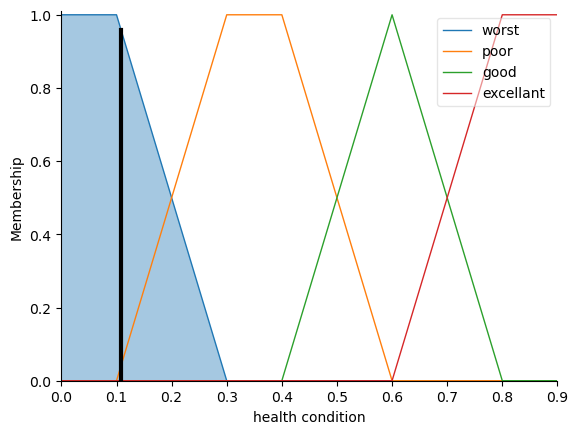

In [42]:
health.input['Systolic'] = 180
health.input['Diastolic'] = 125
health.input['temperature'] = 43
health.compute()
print('health condition', health.output['health condition'])
health_cond.view(sim=health)

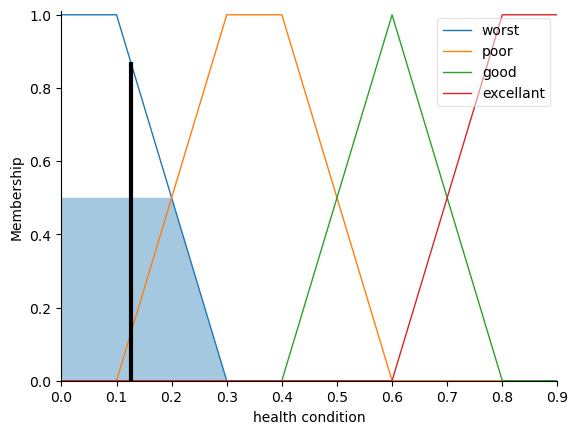

In [41]:
health_cond.view(sim=health)
# modify diastolic range
# modify temperature